/var/folders/tc/54b4pvwj76q1zqy8qd633vf40000gn/T/ipykernel_6802/1378021188.py:25: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv(file_path2)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


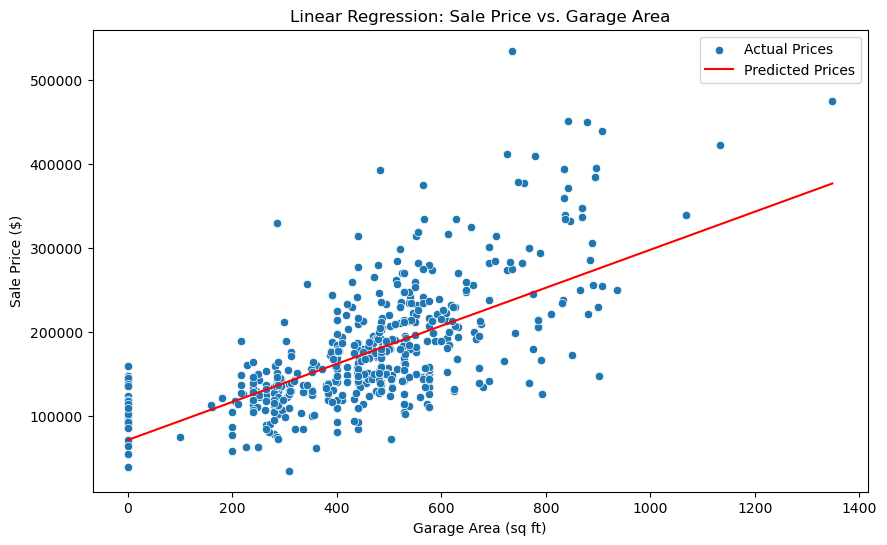

(2807530422.5842924, 0.4564265611210928)

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Load the datasets
file_path1 = 'Ames_HousePrice.csv'
file_path2 = 'Ames Real Estate Data.csv'

data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)

data1.head(), data2.head()
# Filter out rows with missing values in the relevant columns
data = data1[['SalePrice', 'GarageArea']].dropna()

# Define the predictor and target variables
X = data[['GarageArea']]
y = data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['GarageArea'], y=y_test, label='Actual Prices')
sns.lineplot(x=X_test['GarageArea'], y=y_pred, color='red', label='Predicted Prices')
plt.xlabel('Garage Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.title('Linear Regression: Sale Price vs. Garage Area')
plt.legend()
plt.show()

(mse, r2)

In [61]:
# Selecting relevant columns for correlation analysis
relevant_columns = ['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GarageCars', 'GarageArea']
subset_data = data1[relevant_columns]

# Calculating the correlation matrix
correlation_matrix = subset_data.corr()

correlation_matrix['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.790501
GrLivArea      0.719981
TotalBsmtSF    0.652222
GarageCars     0.638801
GarageArea     0.634992
YearBuilt      0.544370
Name: SalePrice, dtype: float64

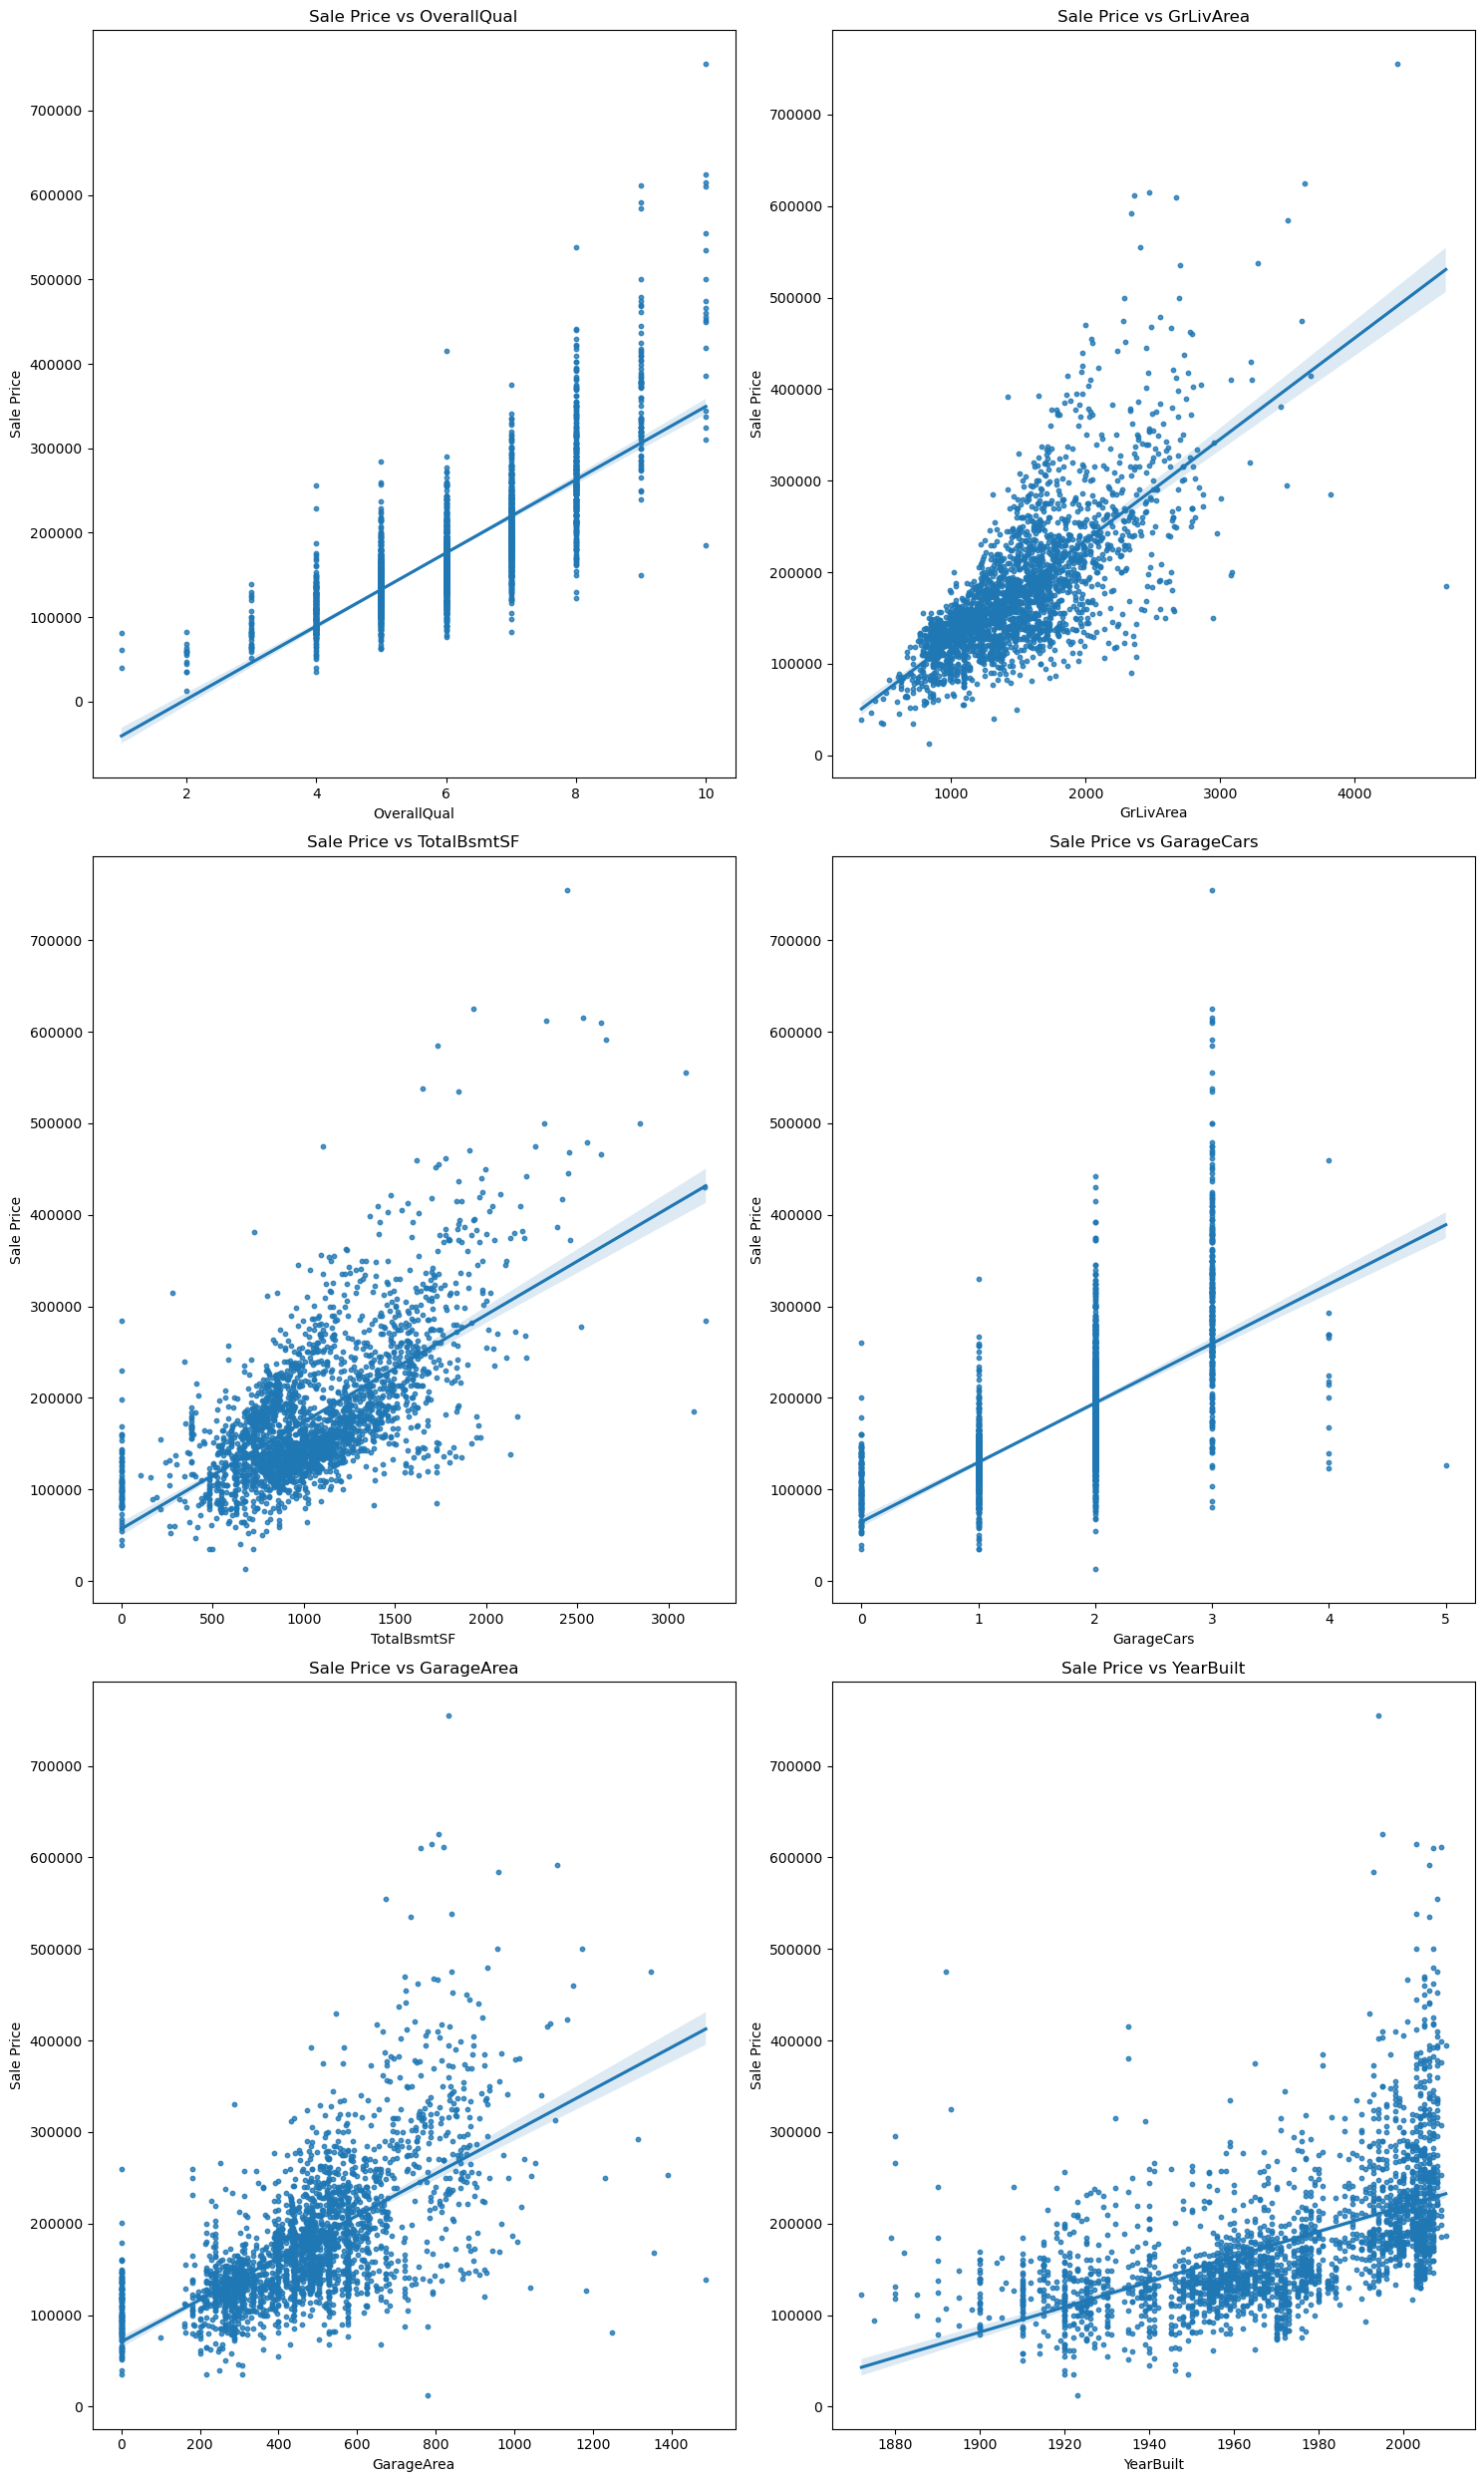

In [63]:
predictors = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'YearBuilt']
# Loop to create scatter plots with regression lines for each predictor against SalePrice
plt.figure(figsize=(15, 25))

for i, predictor in enumerate(predictors, 1):
    plt.subplot(3, 2, i)
    sns.regplot(x=data1[predictor], y=data1['SalePrice'], scatter_kws={'s':10})
    plt.title(f'Sale Price vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

In [67]:
X = data1[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'YearBuilt']].dropna()
y = data1['SalePrice'][X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the coefficients of the model
coefficients_df = pd.DataFrame({
    'Predictor': X.columns,
    'Coefficient': model.coef_
})

# Display the performance metrics and coefficients
mse, r2, coefficients_df

(1081890325.3093839,
 0.825086547750253,
      Predictor   Coefficient
 0  OverallQual  18734.495907
 1    GrLivArea     54.411077
 2  TotalBsmtSF     37.655418
 3   GarageCars   -884.620495
 4   GarageArea     46.760684
 5    YearBuilt    302.736102)

In [71]:
# Define the predictor variables and the target variable
X = data1[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'YearBuilt']].dropna()
y = data1['SalePrice'][X.index]

# Initialize the linear regression model
model = LinearRegression()

# Define the k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=kf)

# Convert negative MSE scores to positive
mse_scores = -mse_scores

# Calculate the mean and standard deviation of MSE and R2 scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

(mean_mse, std_mse, mean_r2, std_r2)

(1069615817.6399208,
 209418471.65821353,
 0.8108823732205312,
 0.023432091859908827)

In [77]:
data = pd.read_csv('Ames_HousePrice.csv')

# Print the column names to check their existence
print(data.columns)

# Separate features and target
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Remove columns if they exist
drop_cols = ['Unnamed: 0', 'PID']
X = X.loc[:, ~X.columns.isin(drop_cols)]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data to a dense format
X_preprocessed = X_preprocessed.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)

# Predict the house prices on the test set
y_pred = model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print(f'Test Loss: {test_loss}, Test MAE: {test_mae}, R^2 Score: {r2}')


Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

In [85]:

# Load the dataset
data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Remove columns if they exist
drop_cols = ['Unnamed: 0', 'PID']
X = X.loc[:, ~X.columns.isin(drop_cols)]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data to a dense format
X_preprocessed = X_preprocessed.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define a function to build the model with different hyperparameters
def build_model(n_layers, n_neurons, learning_rate, activation):
    model = Sequential()
    model.add(Dense(n_neurons, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(n_layers - 1):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(1))  # Output layer for regression
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Hyperparameters to try
n_layers_options = [2, 3]
n_neurons_options = [32, 64, 128]
learning_rate_options = [0.001, 0.01]
activation_options = ['relu', 'tanh']

# Track the best model and its parameters
best_r2 = -np.inf
best_params = {}

# Perform the grid search
for n_layers in n_layers_options:
    for n_neurons in n_neurons_options:
        for learning_rate in learning_rate_options:
            for activation in activation_options:
                print(f'Training model with {n_layers} layers, {n_neurons} neurons, learning rate {learning_rate}, activation {activation}')
                model = build_model(n_layers, n_neurons, learning_rate, activation)
                history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)
                y_pred = model.predict(X_test)
                r2 = r2_score(y_test, y_pred)
                print(f'R^2 Score: {r2}')
                if r2 > best_r2:
                    best_r2 = r2
                    best_params = {
                        'n_layers': n_layers,
                        'n_neurons': n_neurons,
                        'learning_rate': learning_rate,
                        'activation': activation
                    }

print(f'Best R^2 Score: {best_r2}')
print(f'Best parameters: {best_params}')

# Train the best model again with the best parameters
best_model = build_model(best_params['n_layers'], best_params['n_neurons'], best_params['learning_rate'], best_params['activation'])
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)
test_loss, test_mae = best_model.evaluate(X_test, y_test)
y_pred = best_model.predict(X_test)
best_r2 = r2_score(y_test, y_pred)

print(f'Test Loss: {test_loss}, Test MAE: {test_mae}, Best R^2 Score: {best_r2}')


Training model with 2 layers, 32 neurons, learning rate 0.001, activation relu
17/17 [==============================] - 0s 281us/step


R^2 Score: 0.8192260192147591
Training model with 2 layers, 32 neurons, learning rate 0.001, activation tanh
17/17 [==============================] - 0s 270us/step


R^2 Score: -5.434032725682638
Training model with 2 layers, 32 neurons, learning rate 0.01, activation relu
17/17 [==============================] - 0s 291us/step


R^2 Score: 0.9257256904618478
Training model with 2 layers, 32 neurons, learning rate 0.01, activation tanh
17/17 [==============================] - 0s 280us/step


R^2 Score: -5.388289952877467
Training model with 2 layers, 64 neurons, learning rate 0.001, activation relu
17/17 [==============================] - 0s 260us/step


R^2 Score: 0.865883546453182
Training model with 2 layers, 64 neurons, learning rate 0.001, activation tanh
17/17 [==============================] - 0s 279us/step


R^2 Score: -5.428751504317426
Training model with 2 layers, 64 neurons, learning rate 0.01, activation relu
17/17 [==============================] - 0s 260us/step


R^2 Score: 0.9270278427874373
Training model with 2 layers, 64 neurons, learning rate 0.01, activation tanh
17/17 [==============================] - 0s 259us/step


R^2 Score: -5.339238999409874
Training model with 2 layers, 128 neurons, learning rate 0.001, activation relu
17/17 [==============================] - 0s 493us/step


R^2 Score: 0.8915280405317368
Training model with 2 layers, 128 neurons, learning rate 0.001, activation tanh
17/17 [==============================] - 0s 299us/step


R^2 Score: -5.418593771899958
Training model with 2 layers, 128 neurons, learning rate 0.01, activation relu
17/17 [==============================] - 0s 302us/step


R^2 Score: 0.9277321991838627
Training model with 2 layers, 128 neurons, learning rate 0.01, activation tanh
17/17 [==============================] - 0s 298us/step


R^2 Score: -5.242099551646446
Training model with 3 layers, 32 neurons, learning rate 0.001, activation relu
17/17 [==============================] - 0s 285us/step


R^2 Score: 0.8925708225665315
Training model with 3 layers, 32 neurons, learning rate 0.001, activation tanh
17/17 [==============================] - 0s 289us/step


R^2 Score: -5.433887143876322
Training model with 3 layers, 32 neurons, learning rate 0.01, activation relu
17/17 [==============================] - 0s 270us/step


R^2 Score: 0.9299776134113145
Training model with 3 layers, 32 neurons, learning rate 0.01, activation tanh
17/17 [==============================] - 0s 315us/step


R^2 Score: -5.388312160500009
Training model with 3 layers, 64 neurons, learning rate 0.001, activation relu
17/17 [==============================] - 0s 315us/step


R^2 Score: 0.9262666398594911
Training model with 3 layers, 64 neurons, learning rate 0.001, activation tanh
17/17 [==============================] - 0s 275us/step


R^2 Score: -5.4288559772496185
Training model with 3 layers, 64 neurons, learning rate 0.01, activation relu
17/17 [==============================] - 0s 296us/step


R^2 Score: 0.9215303234754048
Training model with 3 layers, 64 neurons, learning rate 0.01, activation tanh
17/17 [==============================] - 0s 274us/step


R^2 Score: -5.339240783161252
Training model with 3 layers, 128 neurons, learning rate 0.001, activation relu
17/17 [==============================] - 0s 313us/step


R^2 Score: 0.9180458386812049
Training model with 3 layers, 128 neurons, learning rate 0.001, activation tanh
17/17 [==============================] - 0s 356us/step


R^2 Score: -5.418709009689228
Training model with 3 layers, 128 neurons, learning rate 0.01, activation relu
17/17 [==============================] - 0s 329us/step


R^2 Score: 0.914000996311403
Training model with 3 layers, 128 neurons, learning rate 0.01, activation tanh
17/17 [==============================] - 0s 388us/step


R^2 Score: -5.242109286881827
Best R^2 Score: 0.9299776134113145
Best parameters: {'n_layers': 3, 'n_neurons': 32, 'learning_rate': 0.01, 'activation': 'relu'}
Epoch 1/50
52/52 [==============================] - 0s 1ms/step - loss: 35191730176.0000 - mae: 171914.2188 - val_loss: 24145201152.0000 - val_mae: 141702.8125
Epoch 2/50
52/52 [==============================] - 0s 681us/step - loss: 6228014080.0000 - mae: 54954.9570 - val_loss: 1048136576.0000 - val_mae: 20889.2324
Epoch 3/50
52/52 [==============================] - 0s 669us/step - loss: 951952064.0000 - mae: 19941.3340 - val_loss: 763667968.0000 - val_mae: 20133.5684
Epoch 4/50
52/52 [==============================] - 0s 685us/step - loss: 746755264.0000 - mae: 17647.1855 - val_loss: 618841344.0000 - val_mae: 17015.2305
Epoch 5/50
52/52 [==============================] - 0s 667us/step - loss: 633623232.0000 - mae: 15917.8652 - val_loss: 557308608.0000 - val_mae: 16254.7930
Epoch 6/50
52/52 [==============================] - 0s

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

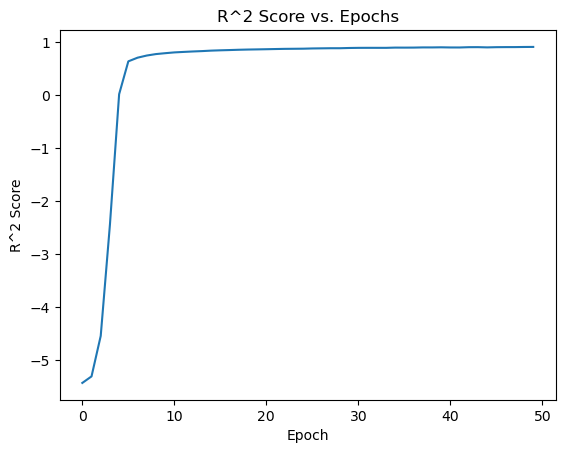

In [23]:
# Load the dataset
data = pd.read_csv('Ames_HousePrice.csv')

# Print the column names to check their existence
print(data.columns)

# Separate features and target
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Remove columns if they exist
drop_cols = ['Unnamed: 0', 'PID']
X = X.loc[:, ~X.columns.isin(drop_cols)]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data to a dense format
X_preprocessed = X_preprocessed.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Custom callback to calculate R^2 score
class R2Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_history.append(r2)

r2_history = []

# Train the model with the custom callback
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[R2Callback()])

# Plot the R^2 scores over the epochs
plt.plot(r2_history)
plt.xlabel('Epoch')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. Epochs')
plt.show()


Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

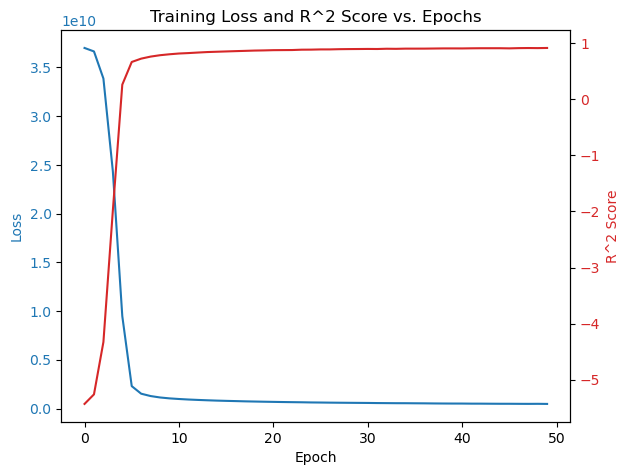

In [83]:
# Load the dataset
data = pd.read_csv('Ames_HousePrice.csv')

# Print the column names to check their existence
print(data.columns)

# Separate features and target
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Remove columns if they exist
drop_cols = ['Unnamed: 0', 'PID']
X = X.loc[:, ~X.columns.isin(drop_cols)]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data to a dense format
X_preprocessed = X_preprocessed.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Custom callback to calculate R^2 score
class R2Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_history.append(r2)

r2_history = []

# Train the model with the custom callback
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[R2Callback()])

# Plot the training loss and R^2 scores over the epochs
fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(history.history['loss'], label='Training Loss', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('R^2 Score', color='tab:red')
ax2.plot(r2_history, label='R^2 Score', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Training Loss and R^2 Score vs. Epochs')
plt.show()


In [33]:


# Load the dataset
data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Remove columns if they exist
drop_cols = ['Unnamed: 0', 'PID']
X = X.loc[:, ~X.columns.isin(drop_cols)]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data to a DataFrame
X_preprocessed = pd.DataFrame(X_preprocessed)

# Ensure all feature names are strings
X_preprocessed.columns = X_preprocessed.columns.astype(str)

# Add intercept for statsmodels
X_preprocessed = sm.add_constant(X_preprocessed)

# Forward selection function
def forward_selection(X, y, threshold_in=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < threshold_in:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

# Perform forward selection
selected_features = forward_selection(X_preprocessed, y)
print(f'Selected features: {selected_features}')

# Build and evaluate the model with selected features
X_selected = X_preprocessed[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Selected features: ['4', 'const', '0', '9', '12', '26', '7', '1', '75', '172', '81', '74', '80', '62', '6', '5', '20', '3', '165', '167', '95', '164', '66', '120', '94', '23', '207', '251', '8', '123', '100', '85', '249', '174', '159', '31', '173', '217', '40', '59', '181', '99', '231', '176', '199', '201', '198', '14', '87', '229', '230', '56', '147', '51', '10', '179', '72', '250', '226', '22', '130', '144', '153', '154', '152', '131', '52', '63', '239', '193', '71', '128']
Mean Squared Error: 494590474.35465115
R^2 Score: 0.9196008438447921


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Selected features: ['4', 'const', '0', '9', '12', '26', '7', '1', '75', '172', '81', '74', '80', '62', '6', '5', '20', '3', '165', '167', '95', '164', '66', '120', '94', '23', '207', '251', '8', '123', '100', '85', '249', '174', '159', '31', '173', '217', '40', '59', '181', '99', '231', '176', '199', '201', '198', '14', '87', '229', '230', '56', '147', '51', '10', '179', '72', '250', '226', '22', '130', '144', '153', '154', '152', '131', '52', '63', '239', '193', '71', '128']
Epoch 1/50
52/52 [==============================] - 0s 2ms/step - loss: 36999151616.0000 - mae: 176950.3125 - val_loss: 35742990336.0000 - val_mae: 176218.6406
Epoch 2/50
52/52 [==============================] - 0s 737us/step - loss: 36756250624.0000 - mae: 176333.2812 - val_loss: 35070181376.0000 - val_mae: 174468.6875
Epoch 3/50
52/52 [==============================] - 0s 719us/step - loss: 34858790912.0000 - mae: 171450.2969 - val_loss: 31345539072.0000 - val_mae: 164528.0781
Epoch 4/50
52/52 [=================

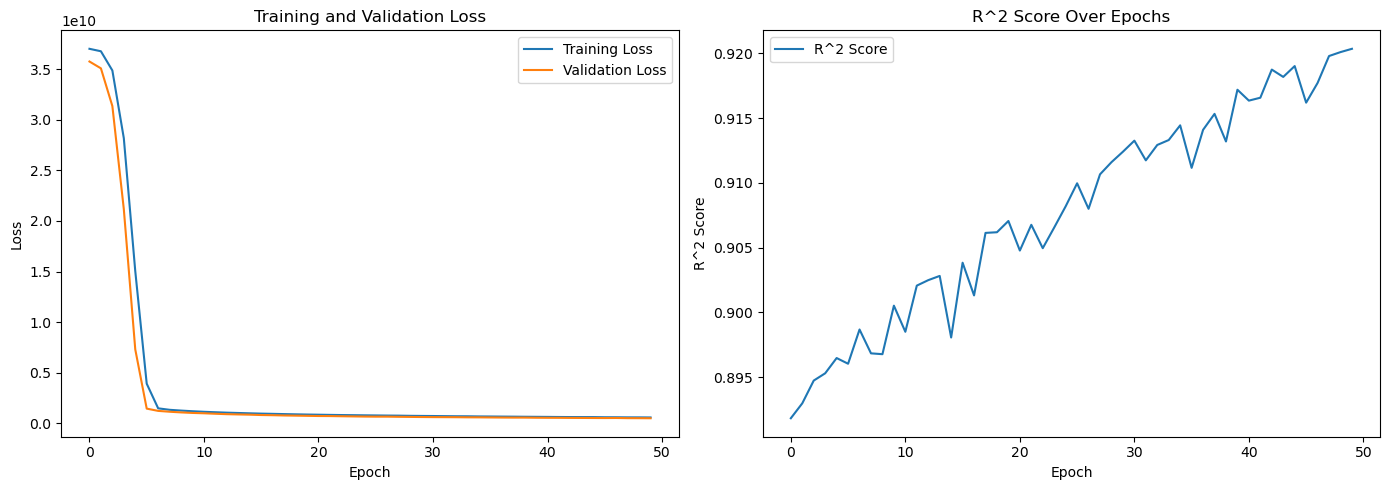

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Remove columns if they exist
drop_cols = ['Unnamed: 0', 'PID']
X = X.loc[:, ~X.columns.isin(drop_cols)]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data to a DataFrame
X_preprocessed = pd.DataFrame(X_preprocessed)

# Ensure all feature names are strings
X_preprocessed.columns = X_preprocessed.columns.astype(str)

# Add intercept for statsmodels
X_preprocessed = sm.add_constant(X_preprocessed)

# Forward selection function
def forward_selection(X, y, threshold_in=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < threshold_in:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

# Perform forward selection
selected_features = forward_selection(X_preprocessed, y)
print(f'Selected features: {selected_features}')

# Build and evaluate the model with selected features
X_selected = X_preprocessed[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

# Calculate R^2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'R^2 Score: {r2}')

# Plot training loss and R^2 score over epochs
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Custom callback to calculate R^2 score for each epoch
class R2Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        y_pred_epoch = self.model.predict(X_test)
        r2_epoch = r2_score(y_test, y_pred_epoch)
        r2_history.append(r2_epoch)

r2_history = []

# Train the model with the custom callback for R^2 score
model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[R2Callback()])

# Plot R^2 score over epochs
plt.subplot(1, 2, 2)
plt.plot(r2_history, label='R^2 Score')
plt.xlabel('Epoch')
plt.ylabel('R^2 Score')
plt.legend()
plt.title('R^2 Score Over Epochs')

plt.tight_layout()
plt.show()


In [37]:
print(r2_history)

[0.8918125386850222, 0.8929663092030579, 0.8947239255493182, 0.8952865019291545, 0.8964652685046892, 0.8960247742497987, 0.8986707102948829, 0.8968279300840997, 0.8967627756122516, 0.9005121209324076, 0.8984948870809182, 0.9020609249075779, 0.9024841998215288, 0.9028113476422736, 0.8980538282358858, 0.9038312765573725, 0.9013048179758715, 0.9061357877797918, 0.9061866160613057, 0.9070552843998596, 0.9047715106535846, 0.9067605380905499, 0.9049542052321234, 0.906552493993946, 0.9081887082850959, 0.9099688810614867, 0.9079981300827007, 0.910661133213582, 0.9116005403613092, 0.9124082184146423, 0.9132641242328925, 0.9117424005032096, 0.9129309064245898, 0.9133112482565453, 0.9144483166757462, 0.9111626482050836, 0.914100235335479, 0.9153341666575768, 0.9131997829752454, 0.9171985936267154, 0.916357129804766, 0.9165819245129108, 0.9187561512797913, 0.9181894322238408, 0.9190268856268586, 0.9162003162960715, 0.9177237965615914, 0.919803620147136, 0.9201069195251917, 0.9203616922220154]


Epoch 1/100
52/52 [==============================] - 0s 2ms/step - loss: 425363680.0000 - mae: 13164.9180 - val_loss: 404832448.0000 - val_mae: 14240.7236
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 422380000.0000 - mae: 13160.9629 - val_loss: 412974624.0000 - val_mae: 14339.8320
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 423113824.0000 - mae: 13132.4062 - val_loss: 407559392.0000 - val_mae: 14328.4707
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 418714912.0000 - mae: 13001.2715 - val_loss: 404624896.0000 - val_mae: 14260.6328
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 421179680.0000 - mae: 13042.2715 - val_loss: 403132288.0000 - val_mae: 14191.6260
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 418435488.0000 - mae: 13004.9619 - val_loss: 401252992.0000 - val_mae: 14144.0488
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - los

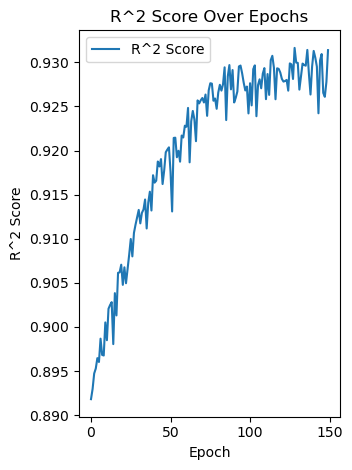

In [39]:
model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[R2Callback()])

# Plot R^2 score over epochs
plt.subplot(1, 2, 2)
plt.plot(r2_history, label='R^2 Score')
plt.xlabel('Epoch')
plt.ylabel('R^2 Score')
plt.legend()
plt.title('R^2 Score Over Epochs')

plt.tight_layout()
plt.show()

In [41]:
print(r2_history)

[0.8918125386850222, 0.8929663092030579, 0.8947239255493182, 0.8952865019291545, 0.8964652685046892, 0.8960247742497987, 0.8986707102948829, 0.8968279300840997, 0.8967627756122516, 0.9005121209324076, 0.8984948870809182, 0.9020609249075779, 0.9024841998215288, 0.9028113476422736, 0.8980538282358858, 0.9038312765573725, 0.9013048179758715, 0.9061357877797918, 0.9061866160613057, 0.9070552843998596, 0.9047715106535846, 0.9067605380905499, 0.9049542052321234, 0.906552493993946, 0.9081887082850959, 0.9099688810614867, 0.9079981300827007, 0.910661133213582, 0.9116005403613092, 0.9124082184146423, 0.9132641242328925, 0.9117424005032096, 0.9129309064245898, 0.9133112482565453, 0.9144483166757462, 0.9111626482050836, 0.914100235335479, 0.9153341666575768, 0.9131997829752454, 0.9171985936267154, 0.916357129804766, 0.9165819245129108, 0.9187561512797913, 0.9181894322238408, 0.9190268856268586, 0.9162003162960715, 0.9177237965615914, 0.919803620147136, 0.9201069195251917, 0.9203616922220154, 0.91